# Analysis of Wine Quality
### Exploaratory Data Analysis, handling missing values to evaluate and predict the quality of wine

### Import the necessary libs

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

#### Context
The dataset is related to variants of the wine (Cabernet Sauvignon, Pinot Noir, Chardonnay) in different regions.

In [54]:
# import the dataset
wine_df = pd.read_csv("../../Hyperion_Training/T35/wine.csv")
wine_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


### Exploration of the Data

In [55]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1103 non-null   int64  
 1   country      1103 non-null   object 
 2   description  1103 non-null   object 
 3   designation  834 non-null    object 
 4   points       1103 non-null   int64  
 5   price        1046 non-null   float64
 6   province     1103 non-null   object 
 7   region_1     930 non-null    object 
 8   region_2     492 non-null    object 
 9   variety      1103 non-null   object 
 10  winery       1103 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.9+ KB


In [56]:
wine_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Features: 
- country
- designation
- price
- province
- region_1
- region_2
- variety
- winery

In [57]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1103.0,551.000000,318.552978,0.0,275.5,551.0,826.5,1102.0
points,1103.0,89.701723,2.390405,85.0,88.0,90.0,91.0,96.0
price,1046.0,40.242830,32.588141,7.0,20.0,31.0,50.0,500.0


- The average value for points is 89.7017 and highest value is 96.0
- The average value for price is 40.24 and highest value is 500

In [58]:
wine_df.shape

(1103, 11)

Check if and how many NaN values exist

In [59]:
wine_df.isna().sum()

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

In [60]:
#detect missing values
wine_df.isna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1098,False,False,False,True,False,False,False,False,False,False,False
1099,False,False,False,False,False,False,False,False,False,False,False
1100,False,False,False,False,False,False,False,False,False,False,False
1101,False,False,False,True,False,False,False,False,True,False,False


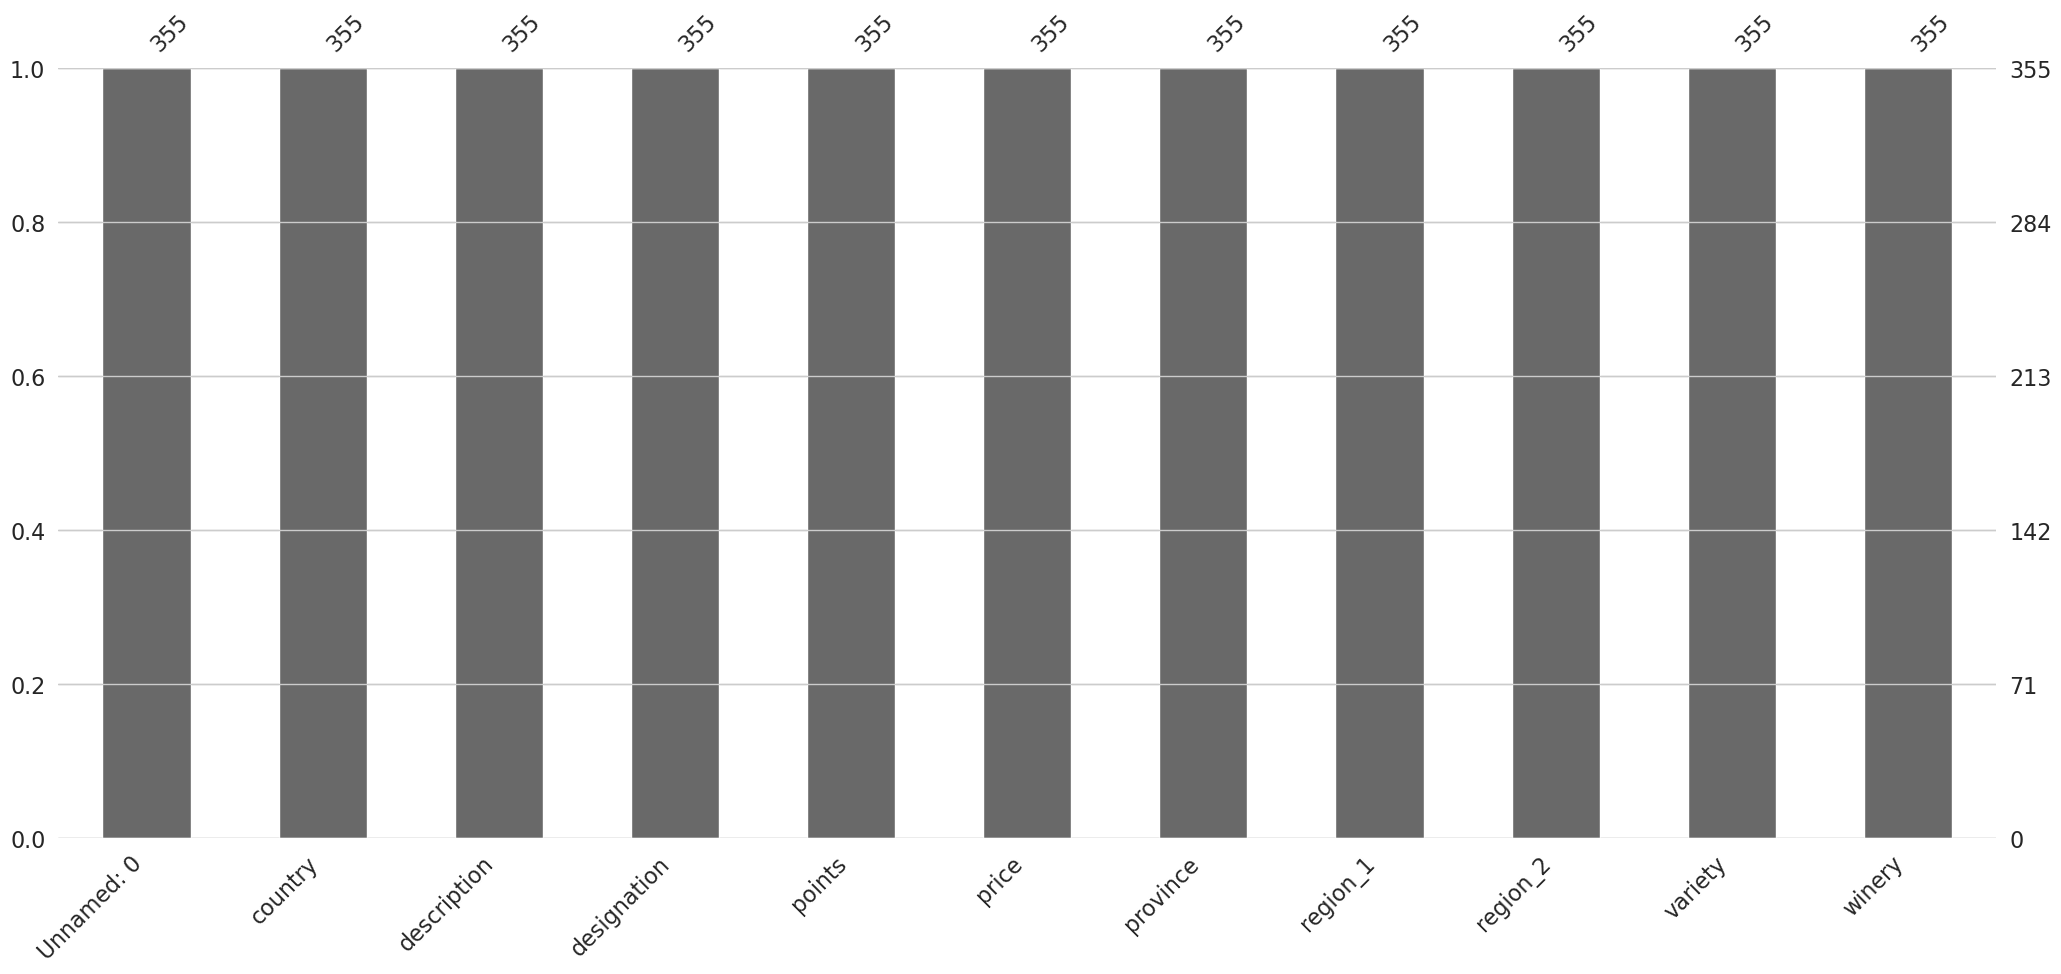

In [113]:
# Plot graphic of missing values
missingno.bar(wine_df) 
#missingno.matrix(wine_df, figsize=(20, 10), color=(0.2, 0.4, 0.6))
plt.show()

<AxesSubplot:>

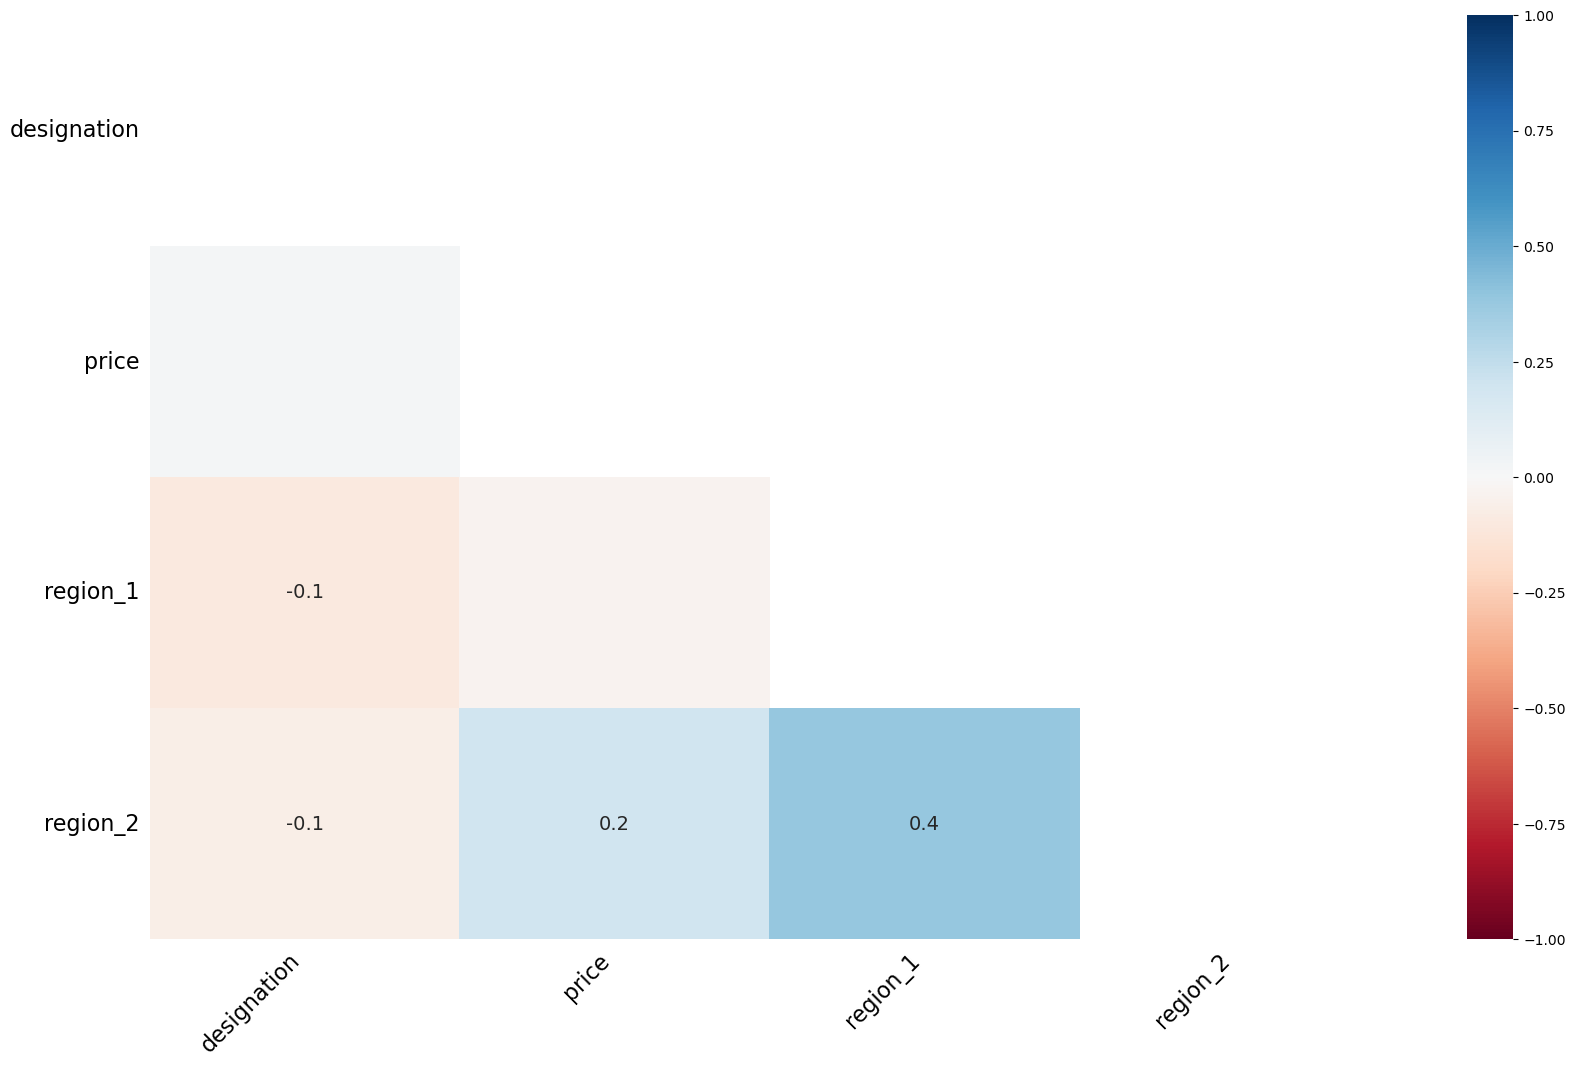

In [68]:
missingno.heatmap(wine_df)

In order to get an even better sense there is need to see what percentage of all the values are missing. If it is a very high percentage, then the data is not suitable.
Seems like there is 9.14% of the values that are missing 


In [73]:
# get the number of missing data points per column
missing_values_count = wine_df.isnull().sum()
missing_values_count

# how many total missing values do we have
total_cells = np.product(wine_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

9.14860298359845

In [74]:
missing_values_count[0:5]# look at the number of missing points in the first ten columns

Unnamed: 0       0
country          0
description      0
designation    269
points           0
dtype: int64

### Option1.Drop missing values

In [75]:
#wine_df = wine_df.drop(columns = ["designation","region_1", "region_2"])
wine_df = wine_df.dropna(axis=0)
wine_df.isna().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

# Imputation?

## Filling in missing values automatically
Use Panda's fillna() function to fill in missing values in a dataframe.i.e fill NaN with 0.

In [76]:
# Create a temporary dataset
temp_df = wine_df

# replace all NA's with 0
temp_df.fillna(0).head()



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [77]:
df_points = temp_df.groupby(by = "points").count()
df_points

,Unnamed: 0,country,description,designation,price,province,region_1,region_2,variety,winery
points,,,,,,,,,,
85,3,3,3,3,3,3,3,3,3,3
86,16,16,16,16,16,16,16,16,16,16
87,35,35,35,35,35,35,35,35,35,35
88,30,30,30,30,30,30,30,30,30,30
89,28,28,28,28,28,28,28,28,28,28
90,85,85,85,85,85,85,85,85,85,85
91,46,46,46,46,46,46,46,46,46,46
92,35,35,35,35,35,35,35,35,35,35
93,37,37,37,37,37,37,37,37,37,37


In [78]:
df_points.duplicated().sum()
df_points.isna().sum()

Unnamed: 0     0
country        0
description    0
designation    0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

In [79]:
temp_df2 = temp_df.drop(columns=["designation", "description"])

In [80]:
temp_df2["price"].value_counts

<bound method IndexOpsMixin.value_counts of 0       235.0
2        90.0
3        65.0
8        65.0
9        60.0
        ...  
1085     40.0
1097     20.0
1099     20.0
1100     28.0
1102     22.0
Name: price, Length: 355, dtype: float64>

In [81]:
#find the most expensive wines
most_expensive_wines = temp_df2.sort_values(["price"], ascending=False).head(10)

In [82]:
most_expensive_wines

,Unnamed: 0,country,points,price,province,region_1,region_2,variety,winery
16,16,US,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
0,0,US,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
231,231,US,93,200.0,California,Napa Valley,Napa,Cabernet Sauvignon,Diamond Creek
14,14,US,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
313,313,US,94,155.0,California,Napa Valley,Napa,Cabernet Sauvignon,Parallel
916,916,US,93,150.0,California,Rutherford,Napa,Cabernet Sauvignon,Freemark Abbey
514,514,US,92,125.0,California,Napa Valley,Napa,Bordeaux-style Red Blend,Sequoia Grove
112,112,US,86,125.0,California,Howell Mountain,Napa,Cabernet Sauvignon,Charles Krug
915,915,US,93,125.0,Oregon,Dundee Hills,Willamette Valley,Chardonnay,Domaine Serene
594,594,US,93,120.0,California,Howell Mountain,Napa,Cabernet Sauvignon,Sbragia


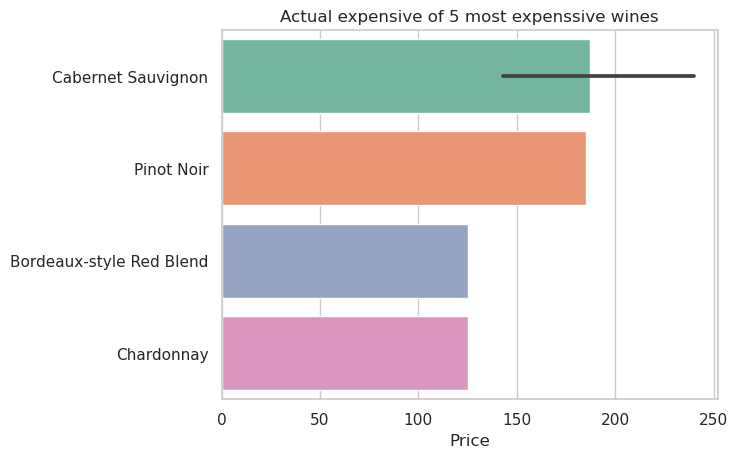

In [111]:
five_most_expensive = most_expensive_wines["price"].head(5)

#Set grid behind graph
sns.set(style="whitegrid")

#Create the barplot figure
figure1 = sns.barplot(data = most_expensive_wines, 
            y= most_expensive_wines["variety"], 
            x= most_expensive_wines["price"], 
            hue_order= most_expensive_wines["price"],
            palette= "Set2",
            
            )
#Add title
figure1.set_title("Actual expensive of 5 most expenssive wines")

#Add exact values for each bas:
#figure1.bar_label(figure1.containers[0], fontsize=10)
#Remove y axis
figure1.set(ylabel="")

#Change x axis
figure1.set(xlabel="Price")

#Show plot
plt.show()

In [84]:
#Find wines with highest point
Most_preferred = wine_df.sort_values(["points"], ascending= False)
Most_preferred[["points","price", "province", "variety","winery"]].head(20)

,points,price,province,variety,winery
0,96,235.0,California,Cabernet Sauvignon,Heitz
3,96,65.0,Oregon,Pinot Noir,Ponzi
2,96,90.0,California,Sauvignon Blanc,Macauley
15,95,90.0,Oregon,Chardonnay,Bergstr√∂m
24,95,45.0,California,Pinot Noir,Comartin
20,95,24.0,California,Ros√©,Heitz
19,95,75.0,California,Pinot Noir,Gary Farrell
16,95,325.0,California,Cabernet Sauvignon,Hall
23,95,60.0,California,Chardonnay,Center of Effort
14,95,185.0,Oregon,Pinot Noir,Domaine Serene


/tmp/ipykernel_4345/1428392829.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),


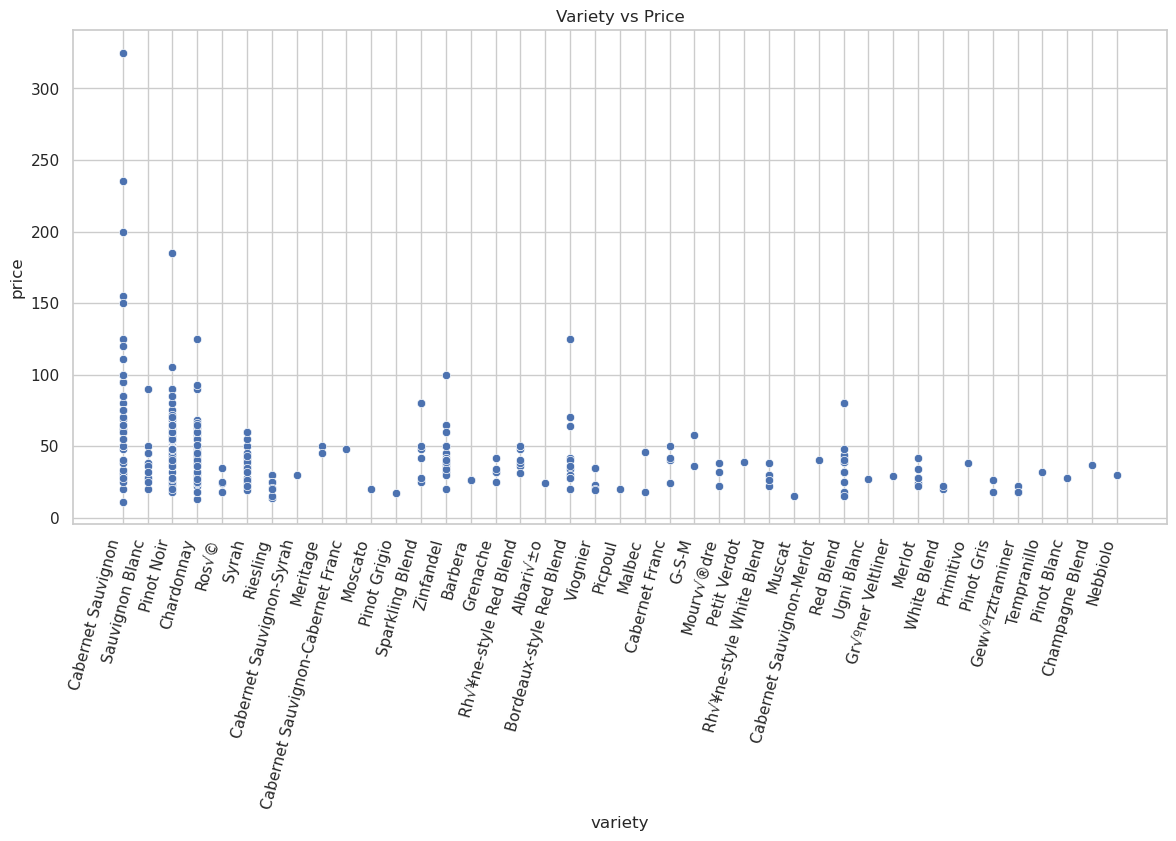

In [91]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # 3 rows, 1 column

# Create the second boxplot on the first plot
plot = sns.scatterplot(data=temp_df2,
            x= "variety",
            y="price"
            )
axes.set_title("Variety vs Price")

# Adjust spacing between subplots
plt.tight_layout()

plot.set_xticklabels(plot.get_xticklabels(),
                      rotation=75, ha='right')

# Save the figure as a .png image
#plt.savefig("boxplots.png")

# Show the plot
plt.show()

In [92]:
#Filtered the data
selected_variety = [
    "Cabernet Sauvignon", 
    "Pinot Noir", 
    "Chardonnay"]
filtered_data = temp_df2[temp_df2['variety'].isin(selected_variety)]



<AxesSubplot:ylabel='Frequency'>

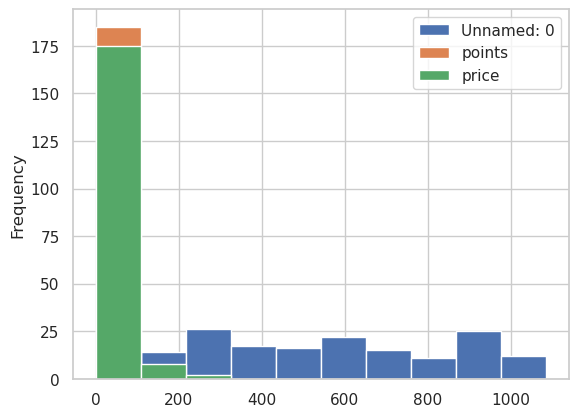

In [93]:
filtered_data.plot.hist(alpha = 1, bins = 10)

Text(0.5, 1.0, 'Histogram of province')

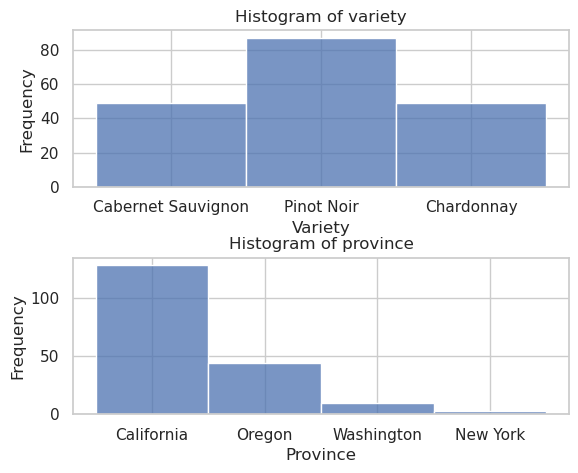

In [107]:
plt.figure()
plt.subplots_adjust(top=0.9, bottom=0.1, wspace=0.4, hspace=0.45)

#Create the first histogram MPG.city
plt.subplot(2, 1, 1)
sns.histplot(filtered_data['variety'], fill = True, bins = 20 )
plt.xlabel('Variety')
plt.ylabel('Frequency')
plt.title('Histogram of variety')

#Create the first histogram MPG.city
plt.subplot(2, 1, 2)
sns.histplot(filtered_data['province'], fill = True, bins = 20 )
plt.xlabel('Province')
plt.ylabel('Frequency')
plt.title('Histogram of province')


### Use variety column and for each of these wine varieties, create Word Clouds of the variety and Province

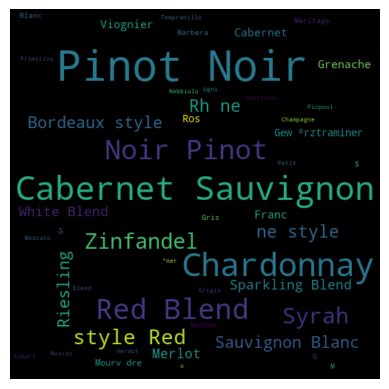

In [108]:
from wordcloud import WordCloud

#Create text
text = (' '.join(temp_df2['variety']))

#Create Visualisation
wordcloud = WordCloud(width = 500, height = 500, margin = 10).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)

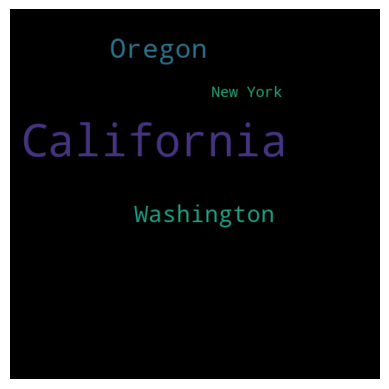

In [109]:
#Create text
text = (' '.join(temp_df2['province']))

#Create Visualisation
wordcloud = WordCloud(width = 500, height = 500, margin = 10).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)

## Brief summary
- The most expense and preferred wine is Cabernet Sauvignon by Heitz.
- The highest frequency is Pinot Noir and in California region.